In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import cv2
import os

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [3]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = 'F:/AI/ML_Specialization_Coursera/C2 - Advanced Learning Algorithms/week2/train'

for filename in os.listdir('F:/AI/ML_Specialization_Coursera/C2 - Advanced Learning Algorithms/week2/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [4]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = 'F:/AI/ML_Specialization_Coursera/C2 - Advanced Learning Algorithms/week2/test'

for filename in os.listdir('F:/AI/ML_Specialization_Coursera/C2 - Advanced Learning Algorithms/week2/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0]


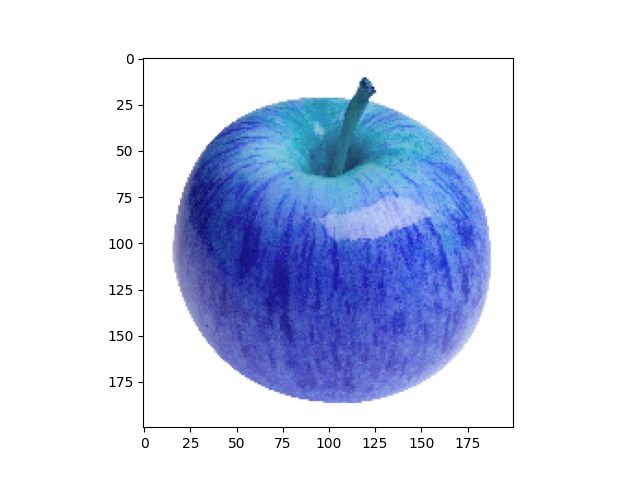

In [5]:
# Visualizing Training data
print(train_labels[1])
plt.imshow(train_images[1])

In [6]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

[1 0 0 0]


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') >= 0.9):

      # Stop if threshold is met
      print("\nAccuracy is higher than 0.9 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [8]:
#Build model
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Conv2D(kernel_size=(3,3), filters = 32, activation='tanh', input_shape=(200,200,3,)),
        Conv2D(filters=30,kernel_size = (3,3),activation='tanh'),
        MaxPool2D(2,2),
        Conv2D(filters=30,kernel_size = (3,3),activation='tanh'),
        MaxPool2D(2,2),
        Conv2D(filters=30,kernel_size = (3,3),activation='tanh'),

        Flatten(),
        Dense(20, activation = 'relu', name = 'Layer1'), # Don't give space to names
        Dense(15, activation = 'relu', name = 'Layer2'),
        Dense(4, activation = 'linear', name = 'Layer3'),

    ]
)
#Compile
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)


model.compile(
    loss = loss_fn,
    metrics = ['acc'],
    optimizer = 'adam'
)

In [9]:
fruits = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_val, y_val), callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 11s 3s/step - loss: 5.0761 - acc: 0.2833 - val_loss: 3.4956 - val_acc: 0.0500
Epoch 2/100
4/4 [==============================] - 10s 2s/step - loss: 2.4060 - acc: 0.1500 - val_loss: 1.4631 - val_acc: 0.2667
Epoch 3/100
4/4 [==============================] - 9s 2s/step - loss: 1.5410 - acc: 0.3278 - val_loss: 1.4787 - val_acc: 0.2167
Epoch 4/100
4/4 [==============================] - 9s 2s/step - loss: 1.3352 - acc: 0.3944 - val_loss: 1.2919 - val_acc: 0.5500
Epoch 5/100
4/4 [==============================] - 8s 2s/step - loss: 0.9221 - acc: 0.6778 - val_loss: 1.0788 - val_acc: 0.6333
Epoch 6/100
4/4 [==============================] - 8s 2s/step - loss: 0.7807 - acc: 0.7167 - val_loss: 0.8009 - val_acc: 0.7667
Epoch 7/100
4/4 [==============================] - 9s 2s/step - loss: 0.5917 - acc: 0.7833 - val_loss: 0.7004 - val_acc: 0.8000
Epoch 8/100
4/4 [==============================] - 9s 2s/step - loss: 0.4234 - acc: 0.8444 - val_loss:

In [10]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 268ms/step - loss: 0.6403 - acc: 0.8333
[0.6402938961982727, 0.8333333134651184]


In [11]:
# Testing predictions and the actual label
n = 33
checkImage = test_images[n:n+1]
checklabel = test_labels[n:n+1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 140ms/step
Actual :-  ['banana']
Predicted :-  banana
